## 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.2f}'.format

df = pd.read_csv('youtube_kr.csv', index_col=0)
df.head(5)

,video_id,video_title,channel_id,channel_title,category,trending_date,trending_week,publishedAt_date,publishedAt_time,publishedAt_week,...,tags_split,tags_len,view_count,play_time,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
0,uq5LClQN3cE,안녕하세요 보겸입니다,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,2020-08-12 00:00:00,Wednesday,2020-08-09 00:00:00,1900-01-01 09:32:48,Sunday,...,"['보겸', 'bokyem']",2,5947503,61,53326,105756,139946,0,0,0
1,I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],UCRuSxVu4iqTK5kCh90ntAgA,총몇명,1,2020-08-12 00:00:00,Wednesday,2020-08-12 00:00:00,1900-01-01 09:00:08,Wednesday,...,"['총몇명', '재밌는 만화', '부락토스', '루시퍼', '총몇명 프리퀄', '총...",6,963384,228,28244,494,3339,0,0,1
2,9d7jNUjBoss,평생 반성하면서 살겠습니다.,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,22,2020-08-12 00:00:00,Wednesday,2020-08-10 00:00:00,1900-01-01 09:54:13,Monday,...,"['양팡', '양팡유튜브', '팡튜브', '가족시트콤', '양팡가족', '양팡가족시...",27,2950885,0,17974,68898,50688,0,0,0
3,3pI_L3-sMVg,안녕하세요 꽈뚜룹입니다.,UCkQCwnkQfgSuPTTnw_Y7v7w,꽈뚜룹 Quaddurup,24,2020-08-12 00:00:00,Wednesday,2020-08-11 00:00:00,1900-01-01 15:00:58,Tuesday,...,"['꽈뚜룹', '한국여행기', 'quaddurup', '뚜룹이', 'korea', ...",12,1743374,81,36893,1798,8751,0,0,1
4,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12 00:00:00,Wednesday,2020-08-11 00:00:00,1900-01-01 09:00:13,Tuesday,...,"['JYP Entertainment', 'JYP', 'J.Y.Park', 'JYPa...",13,3433885,257,353337,9763,23405,0,0,1


## 데이터전처리

In [2]:
df.shape

(79541, 21)

In [3]:
# 첫번째로 인기동영상이 된 데이터가 의미 있다고 판단.
df=df.drop_duplicates(['video_id'], keep = 'first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10921 entries, 0 to 79362
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           10921 non-null  object
 1   video_title        10921 non-null  object
 2   channel_id         10921 non-null  object
 3   channel_title      10921 non-null  object
 4   category           10921 non-null  int64 
 5   trending_date      10921 non-null  object
 6   trending_week      10921 non-null  object
 7   publishedAt_date   10921 non-null  object
 8   publishedAt_time   10921 non-null  object
 9   publishedAt_week   10921 non-null  object
 10  duration           10921 non-null  int64 
 11  tags_split         10921 non-null  object
 12  tags_len           10921 non-null  int64 
 13  view_count         10921 non-null  int64 
 14  play_time          10921 non-null  int64 
 15  likes              10921 non-null  int64 
 16  dislikes           10921 non-null  int64

In [4]:
# 추가 데이터
df["video_len"]=0
df["channel_len"]=0

for i in range(len(df)):    
    df["video_len"].iloc[i]=len(df["video_title"].iloc[i])
    df["channel_len"].iloc[i]=len(df["channel_title"].iloc[i])

C:\Users\yhg31\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [5]:
df["duration"].describe()

count   10921.00
mean        7.28
std         3.07
min         1.00
25%         5.00
50%         7.00
75%         9.00
max        24.00
Name: duration, dtype: float64

In [6]:
#인기 영상이 되는 일수를 일주일은 너무 긴거 같아서 25%의 값인 5로 잡음
df1=df[df["duration"]>7]
df2=df[df["duration"]<=7]
df1["pred"]=1
df2["pred"]=0
df=pd.concat([df1, df2])
df.reset_index(inplace=True, drop=True)
df

C:\Users\yhg31\AppData\Local\Temp/ipykernel_15092/158586571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["pred"]=1
C:\Users\yhg31\AppData\Local\Temp/ipykernel_15092/158586571.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["pred"]=0


,video_id,video_title,channel_id,channel_title,category,trending_date,trending_week,publishedAt_date,publishedAt_time,publishedAt_week,...,play_time,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,video_len,channel_len,pred
0,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12 00:00:00,Wednesday,2020-08-11 00:00:00,1900-01-01 09:00:13,Tuesday,...,257,353337,9763,23405,0,0,1,48,17,1
1,I4Z0_AygkJg,오가나 입니다.,UC8av1CNslnPQS3N08rkzzhQ,오프라이드oh-pride,2,2020-08-14 00:00:00,Friday,2020-08-14 00:00:00,1900-01-01 03:10:50,Friday,...,0,2309,5441,2537,0,0,0,8,13,1
2,z6q98btlSh4,'최초 공개' 댄싱킹★ '박진영'의 'When We Disco(Duet with 선...,UCbD8EppRX3ZwJSou-TVo90A,Mnet K-POP,24,2020-08-14 00:00:00,Friday,2020-08-13 00:00:00,1900-01-01 13:15:01,Thursday,...,364,28722,609,2122,0,0,1,52,10,1
3,mZuzd1B-Mm8,＂너 목소리가 너무 커!!!!＂ 유치뽕짝 말장난의 달인 탁재훈 모음ZIP. 1탄 [...,UCy-swBYpRZx7KW11FStjTgw,레알예능 스브스,24,2020-08-14 00:00:00,Friday,2020-08-13 00:00:00,1900-01-01 09:00:30,Thursday,...,971,5075,362,822,0,0,1,60,8,1
4,XrBgWl6jX5Y,(현장취재) 광화문 100만 모였다! 광화문으로 계속 집결 중! / 신의한수 20....,UCgOLQwRv1r2m9mhE1tfsn3Q,신의한수,25,2020-08-15 00:00:00,Saturday,2020-08-15 00:00:00,1900-01-01 12:12:49,Saturday,...,30216,98992,3349,396,0,0,1,51,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10916,esQPl9_rA6U,전국민의 99%가 홍합으로 알고 먹는 이것의 정체,UCY2uWQDCzn_ZE-JpTfDRR2A,입질의추억TV jiminTV,24,2021-09-22 00:00:00,Wednesday,2021-09-21 00:00:00,1900-01-01 10:01:25,Tuesday,...,799,4509,135,407,0,0,1,27,15,0
10917,WL4ipAjcspE,[웰메이드 X 임영웅] 21FW 시즌 화보 촬영 비하인드 영상 공개,UCgeeQuH16jS4UEOIxc-kwoQ,웰메이드,24,2021-09-22 00:00:00,Wednesday,2021-09-21 00:00:00,1900-01-01 02:00:05,Tuesday,...,410,17438,57,1136,0,0,1,37,4,0
10918,yqLla5LbpH8,사랑인가? 증오인가? 애정과 비명이 난무하는 아리랑은고양이 채널 통역!,UC69l_rtlCQ7M4Mz2RCS80BA,미야옹철의 냥냥펀치,15,2021-09-22 00:00:00,Wednesday,2021-09-21 00:00:00,1900-01-01 10:00:33,Tuesday,...,744,4399,34,280,0,0,1,39,10,0
10919,n028FLMfsSY,송편 안에 100만원이 들어가 있는 100만원짜리 대왕 송편 선물하기,UC1dK7oMUSR9Rnk1BSpOKZng,정선호,22,2021-09-22 00:00:00,Wednesday,2021-09-21 00:00:00,1900-01-01 05:26:41,Tuesday,...,917,6545,168,561,0,0,1,38,3,0


In [7]:
#데이터를 불러올때마다 날짜와 관련된 코드는 이상이 있음
df.iloc[:, 5:10]

,trending_date,trending_week,publishedAt_date,publishedAt_time,publishedAt_week
0,2020-08-12 00:00:00,Wednesday,2020-08-11 00:00:00,1900-01-01 09:00:13,Tuesday
1,2020-08-14 00:00:00,Friday,2020-08-14 00:00:00,1900-01-01 03:10:50,Friday
2,2020-08-14 00:00:00,Friday,2020-08-13 00:00:00,1900-01-01 13:15:01,Thursday
3,2020-08-14 00:00:00,Friday,2020-08-13 00:00:00,1900-01-01 09:00:30,Thursday
4,2020-08-15 00:00:00,Saturday,2020-08-15 00:00:00,1900-01-01 12:12:49,Saturday
...,...,...,...,...,...
10916,2021-09-22 00:00:00,Wednesday,2021-09-21 00:00:00,1900-01-01 10:01:25,Tuesday
10917,2021-09-22 00:00:00,Wednesday,2021-09-21 00:00:00,1900-01-01 02:00:05,Tuesday
10918,2021-09-22 00:00:00,Wednesday,2021-09-21 00:00:00,1900-01-01 10:00:33,Tuesday
10919,2021-09-22 00:00:00,Wednesday,2021-09-21 00:00:00,1900-01-01 05:26:41,Tuesday


In [8]:
df["trending_week"]=df["trending_week"].replace(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], [0, 1, 2, 3, 4, 5, 6])
df["publishedAt_week"]=df["publishedAt_week"].replace(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], [0, 1, 2, 3, 4, 5, 6])
df["trending_date"]=df["trending_date"].str.split(' ').str[0]
df["publishedAt_date"]=df["publishedAt_date"].str.split(' ').str[0]
df["publishedAt_time"]=df["publishedAt_time"].str.split(' ').str[1]

In [9]:
df["trending_week"].value_counts()

4    1635
3    1607
2    1603
0    1588
5    1583
6    1519
1    1386
Name: trending_week, dtype: int64

In [10]:
df["publishedAt_week"].value_counts()

4    1792
3    1719
2    1634
1    1523
0    1476
5    1459
6    1318
Name: publishedAt_week, dtype: int64

In [11]:
df.iloc[:, 5:9]

,trending_date,trending_week,publishedAt_date,publishedAt_time
0,2020-08-12,2,2020-08-11,09:00:13
1,2020-08-14,4,2020-08-14,03:10:50
2,2020-08-14,4,2020-08-13,13:15:01
3,2020-08-14,4,2020-08-13,09:00:30
4,2020-08-15,5,2020-08-15,12:12:49
...,...,...,...,...
10916,2021-09-22,2,2021-09-21,10:01:25
10917,2021-09-22,2,2021-09-21,02:00:05
10918,2021-09-22,2,2021-09-21,10:00:33
10919,2021-09-22,2,2021-09-21,05:26:41


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10921 entries, 0 to 10920
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           10921 non-null  object
 1   video_title        10921 non-null  object
 2   channel_id         10921 non-null  object
 3   channel_title      10921 non-null  object
 4   category           10921 non-null  int64 
 5   trending_date      10921 non-null  object
 6   trending_week      10921 non-null  int64 
 7   publishedAt_date   10921 non-null  object
 8   publishedAt_time   10921 non-null  object
 9   publishedAt_week   10921 non-null  int64 
 10  duration           10921 non-null  int64 
 11  tags_split         10921 non-null  object
 12  tags_len           10921 non-null  int64 
 13  view_count         10921 non-null  int64 
 14  play_time          10921 non-null  int64 
 15  likes              10921 non-null  int64 
 16  dislikes           10921 non-null  int64

In [13]:
df=df.sort_values(by=['trending_date'], axis=0)
df.reset_index(inplace=True, drop=True)
df.head()

,video_id,video_title,channel_id,channel_title,category,trending_date,trending_week,publishedAt_date,publishedAt_time,publishedAt_week,...,play_time,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,video_len,channel_len,pred
0,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12,2,2020-08-11,09:00:13,1,...,257,353337,9763,23405,0,0,1,48,17,1
1,IOe0GGG2wcg,태권도장에서 당했던 잊혀지지 않는 사건... ㅣ사연툰,UCHj3qb7u4WUfUrjlOJtPdKA,호돌이 영상툰,1,2020-08-12,2,2020-08-10,02:45:00,0,...,0,4642,126,1359,0,0,1,29,7,0
2,DNOOxqIus08,멸치국수 천원??전메뉴 5개 다먹어도 6500원.. 두번 먹었습니다!!,UCsNVs68quFJMaDmR6frfUsQ,야식이,24,2020-08-12,2,2020-08-08,14:37:55,5,...,1070,14089,410,2175,0,0,1,39,3,0
3,NFa38a2XStM,이게 왜 진짜야..? 실제 있었던 일인데도 주작같은 황당한 실화 TOP10,UCvi7EYzMlfSB0ZkX55i5LlA,타임스낵,24,2020-08-12,2,2020-08-08,02:00:02,5,...,330,13347,197,2524,0,0,1,41,4,0
4,F1gLID2d8qY,칸토 (KANTO) 'I'm So Fine (Feat. 김호중)' LYRIC VIDEO,UCAkWpyeieFjzS7GzSJMArhQ,BRANDNEW MUSIC,10,2020-08-12,2,2020-08-09,09:00:08,6,...,207,7260,23,1507,0,0,1,48,14,0


In [14]:
#데이터가 딱 두개로 나뉘는 이쁜 형태가 아님.
df["pred"].value_counts()

0    6033
1    4888
Name: pred, dtype: int64

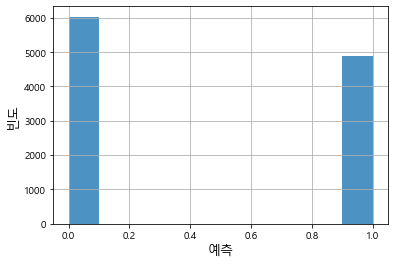

In [15]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc 
import seaborn as sns
font_name=font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() 
rc('font', family=font_name) 

plt.hist(df["pred"], bins=10, alpha=.8)
plt.ylabel("빈도", fontsize=13)
plt.xlabel("예측", fontsize=13)
plt.grid()
plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10921 entries, 0 to 10920
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           10921 non-null  object
 1   video_title        10921 non-null  object
 2   channel_id         10921 non-null  object
 3   channel_title      10921 non-null  object
 4   category           10921 non-null  int64 
 5   trending_date      10921 non-null  object
 6   trending_week      10921 non-null  int64 
 7   publishedAt_date   10921 non-null  object
 8   publishedAt_time   10921 non-null  object
 9   publishedAt_week   10921 non-null  int64 
 10  duration           10921 non-null  int64 
 11  tags_split         10921 non-null  object
 12  tags_len           10921 non-null  int64 
 13  view_count         10921 non-null  int64 
 14  play_time          10921 non-null  int64 
 15  likes              10921 non-null  int64 
 16  dislikes           10921 non-null  int64

In [17]:
X=df[["category", "publishedAt_week", "tags_len", "view_count", "play_time", "likes", "dislikes",
      "comment_count", "comments_disabled", "ratings_disabled", "description", "video_len", "channel_len"]]
Y=df["pred"]

In [18]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=0).fit_resample(X, Y)

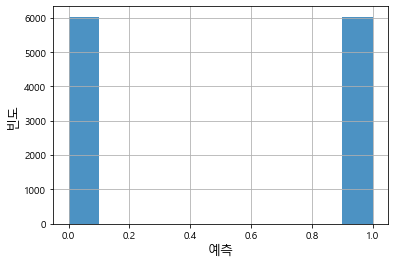

In [19]:
plt.hist(y_resampled, bins=10, alpha=.8)
plt.ylabel("빈도", fontsize=13)
plt.xlabel("예측", fontsize=13)
plt.grid()
plt.show()

##  train_test 분리

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled)

In [21]:
x_train.head()

,category,publishedAt_week,tags_len,view_count,play_time,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,video_len,channel_len
3834,17,2,16,187421,2258,2596,71,245,0,0,1,90,6
10917,15,1,25,224462,610,9232,71,585,0,0,1,44,16
9978,17,2,32,295014,700,12258,53,866,0,0,1,52,3
9481,10,0,5,97473,209,1913,32,0,0,0,1,12,22
8561,24,4,52,195562,792,4846,40,542,0,0,1,45,11


In [22]:
#스케일
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [23]:
x_test_scaled

array([[-3.05288672,  1.62752646, -0.58730953, ...,  0.14486588,
        -1.34065936, -1.29305091],
       [ 1.19006924,  0.57111107, -0.32127007, ...,  0.14486588,
        -1.20554925, -0.49315908],
       [ 0.24719013,  0.57111107, -0.90655688, ...,  0.14486588,
        -0.71014553, -1.13307255],
       ...,
       [-1.63856807,  1.62752646, -0.95976477, ...,  0.14486588,
         1.18139597,  0.46671112],
       [-0.53854245, -0.48530432, -0.0552306 , ...,  0.14486588,
         0.37073532, -0.49315908],
       [-1.63856807,  1.09931877, -0.26806217, ...,  0.14486588,
         2.48746033,  1.42658131]])

## 지도학습 분류

### KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)
knn_train_pred = knn.predict(x_train_scaled)
knn_test_pred = knn.predict(x_test_scaled)

In [25]:
from sklearn.metrics import accuracy_score
print("knn train 정확도 : {0:.3f}".format(accuracy_score(y_train, knn_train_pred)))
print("knn test  정확도 : {0:.3f}".format(accuracy_score(y_test, knn_test_pred)))

knn train 정확도 : 0.729
knn test  정확도 : 0.579


In [26]:
from sklearn.metrics import confusion_matrix

print("KNN train\n", confusion_matrix(y_train, knn_train_pred))
print()
print("KNN test\n", confusion_matrix(y_test, knn_test_pred))

KNN train
 [[3250 1303]
 [1153 3343]]

KNN test
 [[841 639]
 [630 907]]


In [27]:
train_sc = []
test_sc = []
len_sc=[]

for k in range(1,15):
    k_knn = KNeighborsClassifier(n_neighbors=k)
    k_knn.fit(x_train_scaled, y_train)
    k_pred = k_knn.predict(x_test_scaled)
    train_sc.append(k_knn.score(x_train_scaled, y_train))
    test_sc.append((k_pred==y_test).mean())
    len_sc.append(k)

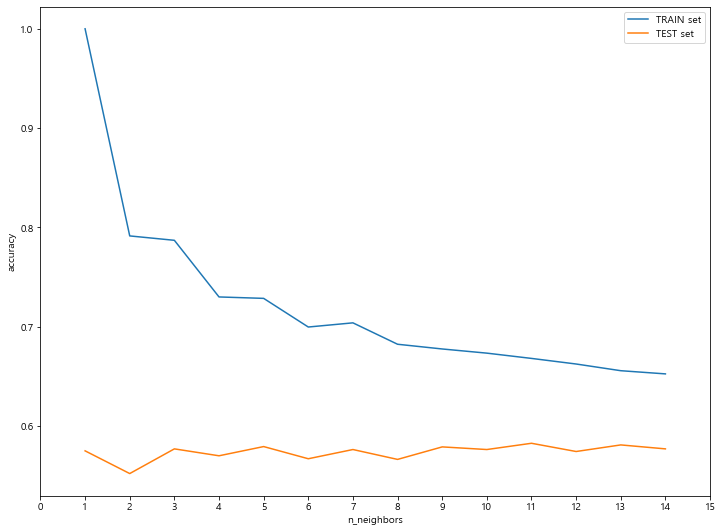

In [28]:
plt.figure(figsize=(12, 9))
plt.plot(len_sc, train_sc, label='TRAIN set')
plt.plot(len_sc, test_sc, label='TEST set')
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.xticks(np.arange(0, 16, step=1))
plt.legend()

In [29]:
#k값 찾아서 넣기
knn1 = KNeighborsClassifier(n_neighbors=2)
knn1.fit(x_train_scaled, y_train)
knn_train_pred1 = knn1.predict(x_train_scaled)
knn_test_pred1 = knn1.predict(x_test_scaled)

In [30]:
print("KNN k값 train 정확도 : {0:.3f}".format(accuracy_score(y_train, knn_train_pred1)))
print("KNN k값 test  정확도 : {0:.3f}".format(accuracy_score(y_test, knn_test_pred1)))

KNN k값 train 정확도 : 0.791
KNN k값 test  정확도 : 0.552


In [31]:
print("KNN train\n", confusion_matrix(y_train, knn_train_pred1))
print()
print("KNN test\n", confusion_matrix(y_test, knn_test_pred1))

KNN train
 [[4553    0]
 [1887 2609]]

KNN test
 [[1166  314]
 [1037  500]]


### LDA
- 2개이상 범주때 사용, 이 범주가 명확할수록 좋음

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(x_train_scaled, y_train)
lda_train_pred = lda.predict(x_train_scaled)
lda_test_pred = lda.predict(x_test_scaled)

In [33]:
print("LDA train 정확도 : {0:.3f}".format(accuracy_score(y_train, lda_train_pred)))
print("LDA test  정확도 : {0:.3f}".format(accuracy_score(y_test, lda_test_pred)))

LDA train 정확도 : 0.535
LDA test  정확도 : 0.526


In [34]:
print("LDA 전체 train\n", confusion_matrix(y_train, lda_train_pred))
print()
print("LDA 전체 test\n", confusion_matrix(y_test, lda_test_pred))

LDA 전체 train
 [[2180 2373]
 [1839 2657]]

LDA 전체 test
 [[701 779]
 [651 886]]


### SVM
- 어느 한쪽에 치우쳐지지 않고 양쪽에 균등할 경우 사용
- 과적합 적음

In [35]:
from sklearn import svm
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train_scaled, y_train)
svm_train_pred = svm.predict(x_train_scaled)
svm_test_pred = svm.predict(x_test_scaled)

In [36]:
from sklearn.metrics import accuracy_score
print("svm train 정확도 : {0:.3f}".format(accuracy_score(y_train, svm_train_pred)))
print("svm test  정확도 : {0:.3f}".format(accuracy_score(y_test, svm_test_pred)))

svm train 정확도 : 0.604
svm test  정확도 : 0.567


In [37]:
from sklearn.metrics import confusion_matrix

print("SVM train\n", confusion_matrix(y_train, svm_train_pred))
print()
print("SVM test\n", confusion_matrix(y_test, svm_test_pred))

SVM train
 [[2558 1995]
 [1587 2909]]

SVM test
 [[780 700]
 [606 931]]
